In [1]:
import numpy as np
import tensorflow as tf

In [2]:
cnn =  tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/my_cnn.h5')

In [3]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

In [4]:
# 데이터셋을 읽어서 신경망에 입력형태로 변환 : 데이터로드 ,표준화, onehotencoding
(x_train,y_train),(x_test,y_test) =   tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
y_train,y_test = tf.keras.utils.to_categorical(y_train), tf.keras.utils.to_categorical(y_test)

In [5]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 11s 34ms/step - loss: 0.6266 - accuracy: 0.7961


[0.6265958547592163, 0.7961000204086304]

In [6]:
# 커널 시각화
for layer in cnn.layers:
  if 'conv' in layer.name:
    kernel,biases = layer.get_weights()
    print(layer.name, kernel.shape)  # 커널의 텐서모양을 출력

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)
conv2d_2 (3, 3, 32, 64)
conv2d_3 (3, 3, 64, 64)


In [7]:
# 0층의 커널 정보를 저장
kernel, biases =  cnn.layers[0].get_weights() 

In [8]:
minv, maxv =  kernel.min(),kernel.max()

In [9]:
kernel = (kernel-minv) / (maxv-minv)
n_kernel = 32

In [10]:
import matplotlib.pyplot as plt

In [11]:
kernel.shape
temp = kernel[:,:,:,0]
temp[:,:,2]

array([[0.4641721 , 0.5292803 , 0.26226643],
       [0.43777627, 0.9718206 , 0.6998145 ],
       [0.611217  , 0.6576995 , 0.2921694 ]], dtype=float32)

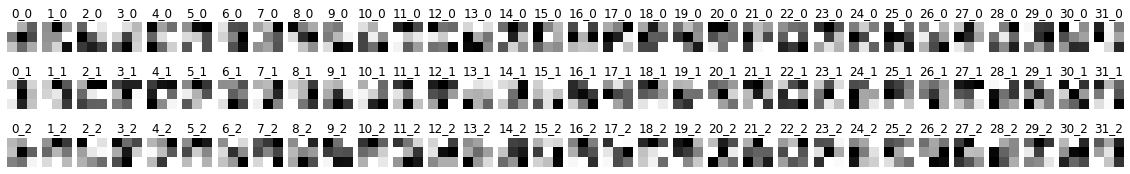

In [14]:
fig, ax = plt.subplots(3,32,figsize=(20,3))
for i in range(n_kernel):   # i번째 커널
  f = kernel[:,:,:,i]
  for j in range(3):        # j번째 채널
    ax[j,i].imshow(f[:,:,j],cmap='gray_r')
    ax[j,i].axis('off')
    ax[j,i].set_title(str(i)+"_"+str(j))
plt.show()  





In [19]:
# 학습한 컨볼류션 신경망의 특징 맵을 시각화
for layer in cnn.layers:
  if 'conv' in layer.name:
    print(layer.name, layer.output.shape)  

conv2d (None, 30, 30, 32)
conv2d_1 (None, 28, 28, 32)
conv2d_2 (None, 12, 12, 64)
conv2d_3 (None, 10, 10, 64)


In [20]:
from tensorflow.keras.models import Model

In [22]:
partial_model =  Model(inputs = cnn.inputs, outputs = cnn.layers[0].output  )  # 0번째 층만 떼어냄
partial_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [23]:
feature_map =  partial_model.predict(x_test)
fm = feature_map[1] # 테스트 집합의 1번영상에 대한 특징 맵 -> 시각화

313/313 [==============================] - 2s 7ms/step


In [31]:
fm.shape

(30, 30, 32)

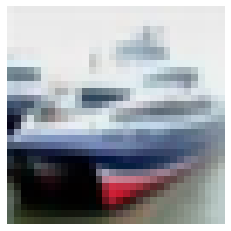

In [25]:
plt.imshow(x_test[1])
plt.axis('off')
plt.show()

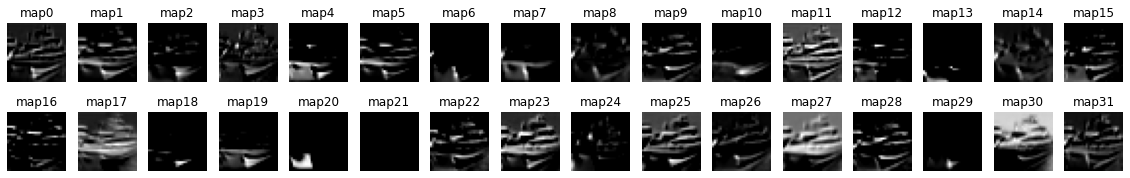

In [28]:
fig, ax = plt.subplots(2,16,figsize=(20,3))
for i in range(32):
  ax[i//16, i%16].imshow(fm[:,:,i],cmap='gray')
  ax[i//16, i%16].axis('off')
  ax[i//16, i%16].set_title("map"+str(i))
plt.show()  

In [29]:
# 딥러닝 전략
# 충분히 큰 신경망 구조를 사용 다양한 규제 기법을 적용 ->과적합을 방지
# 데이터 증대,드랍아웃, 가중치 감소, 앙상블, 배치 정규화 등의 ....

In [30]:
# real data를 늘리는 행위는 비용증가
# 데이터를 인위적으로 늘리는 데이터 증대 data augmentation을 적용
# 영상을 이동,회전,반전
# 명암조정....